In [2]:
import pandas as pd

# بارگذاری فایل
data = pd.read_csv('C:/ab_testing.csv')

# نمایش اطلاعات اولیه
print(data.head())
print(data.info())

   User ID Group  Page Views  Time Spent Conversion   Device          Location
0    14292     B           3         424         No   Mobile  Northern Ireland
1    11682     A           9         342         No   Mobile          Scotland
2    19825     A           2         396         No  Desktop  Northern Ireland
3    16080     B           4         318         No  Desktop             Wales
4    18851     A           1         338        Yes  Desktop          Scotland
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   User ID     5000 non-null   int64 
 1   Group       5000 non-null   object
 2   Page Views  5000 non-null   int64 
 3   Time Spent  5000 non-null   int64 
 4   Conversion  5000 non-null   object
 5   Device      5000 non-null   object
 6   Location    5000 non-null   object
dtypes: int64(3), object(4)
memory usage: 273.6+ KB
None


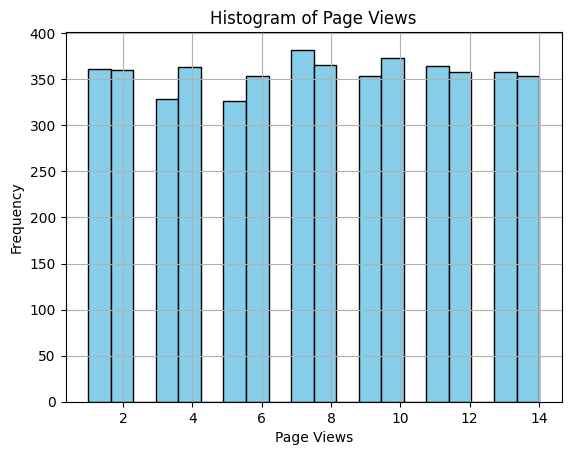

In [4]:
import matplotlib.pyplot as plt

# هیستوگرام تعداد بازدید صفحات
data['Page Views'].hist(bins=20, edgecolor='black', color='skyblue')
plt.title('Histogram of Page Views')
plt.xlabel('Page Views')
plt.ylabel('Frequency')
plt.show()

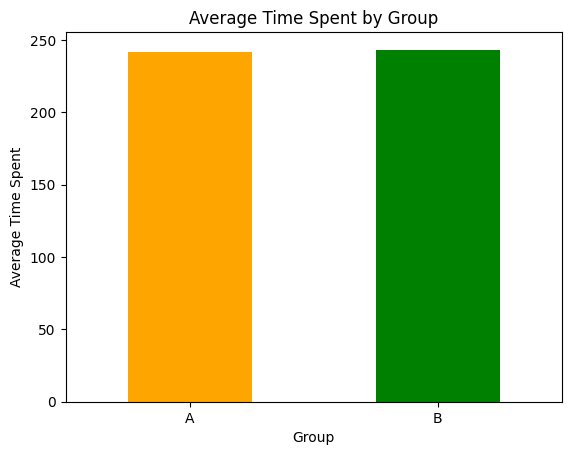

In [5]:
# میانگین زمان صرف‌شده برای هر گروه
mean_time_spent = data.groupby('Group')['Time Spent'].mean()

# رسم نمودار میله‌ای
mean_time_spent.plot(kind='bar', color=['orange', 'green'])
plt.title('Average Time Spent by Group')
plt.xlabel('Group')
plt.ylabel('Average Time Spent')
plt.xticks(rotation=0)
plt.show()

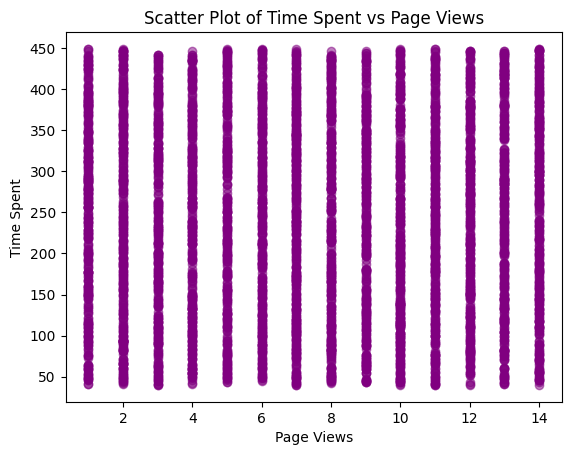

In [6]:
# نمودار پراکندگی
plt.scatter(data['Page Views'], data['Time Spent'], alpha=0.5, color='purple')
plt.title('Scatter Plot of Time Spent vs Page Views')
plt.xlabel('Page Views')
plt.ylabel('Time Spent')
plt.show()

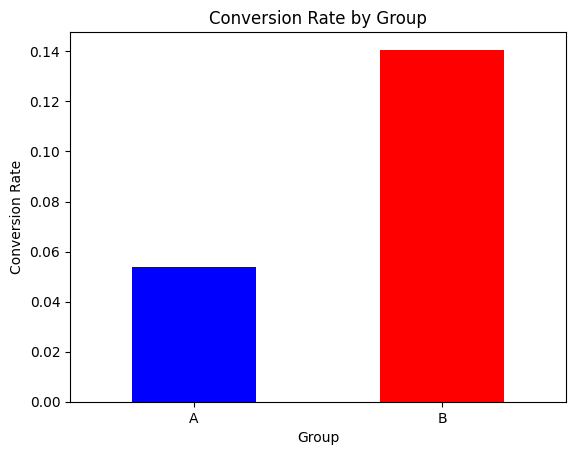

In [7]:
# نرخ تبدیل در هر گروه
conversion_rate = data.groupby('Group')['Conversion'].apply(lambda x: (x == 'Yes').mean())

# رسم نمودار
conversion_rate.plot(kind='bar', color=['blue', 'red'])
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=0)
plt.show()

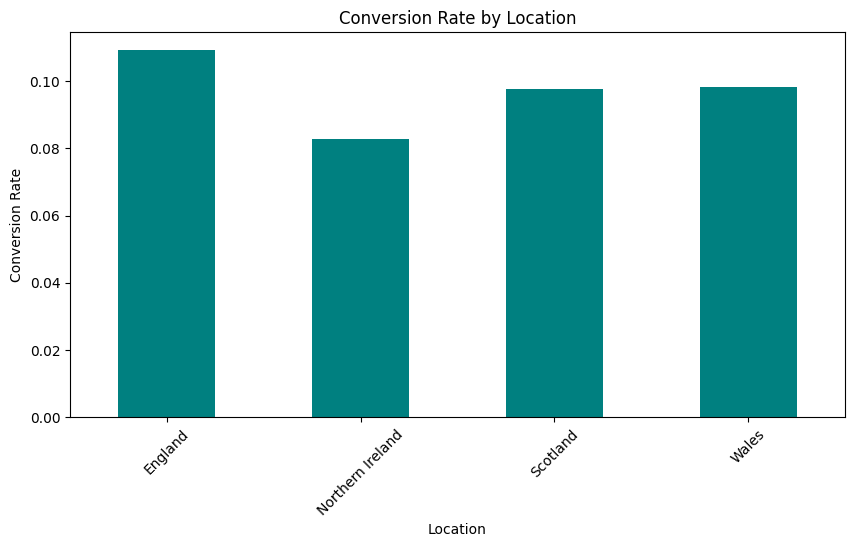

In [8]:
# نرخ تبدیل بر اساس مکان جغرافیایی
location_conversion = data.groupby('Location')['Conversion'].apply(lambda x: (x == 'Yes').mean())

# رسم نمودار
location_conversion.plot(kind='bar', color='teal', figsize=(10, 5))
plt.title('Conversion Rate by Location')
plt.xlabel('Location')
plt.ylabel('Conversion Rate')
plt.xticks(rotation=45)
plt.show()

In [10]:
# بررسی وجود داده‌های گمشده
print(data.isnull().sum())

# اگر داده‌های گمشده وجود دارد، حذف یا جایگزینی
data = data.dropna()  # حذف ردیف‌های گمشده
# یا:
# data.fillna(value, inplace=True)  # جایگزینی مقادیر گمشده

User ID       0
Group         0
Page Views    0
Time Spent    0
Conversion    0
Device        0
Location      0
dtype: int64


In [11]:
# تبدیل ستون Conversion به مقادیر عددی
data['Conversion'] = data['Conversion'].map({'Yes': 1, 'No': 0})

# ایجاد یک ستون جدید برای نرخ زمان صرف‌شده به ازای هر بازدید
data['Time per Page'] = data['Time Spent'] / data['Page Views']

# نمایش داده‌ها پس از تبدیل
print(data.head())

   User ID Group  Page Views  Time Spent  Conversion   Device  \
0    14292     B           3         424           0   Mobile   
1    11682     A           9         342           0   Mobile   
2    19825     A           2         396           0  Desktop   
3    16080     B           4         318           0  Desktop   
4    18851     A           1         338           1  Desktop   

           Location  Time per Page  
0  Northern Ireland     141.333333  
1          Scotland      38.000000  
2  Northern Ireland     198.000000  
3             Wales      79.500000  
4          Scotland     338.000000  


In [12]:
from sklearn.preprocessing import StandardScaler

# انتخاب ویژگی‌های عددی برای خوشه‌بندی
features = data[['Page Views', 'Time Spent', 'Time per Page']]

# نرمال‌سازی داده‌ها برای بهبود نتایج خوشه‌بندی
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

# خوشه‌بندی افرازبندی
try:
    agglomerative = AgglomerativeClustering(n_clusters=3)
    agglomerative_labels = agglomerative.fit_predict(scaled_features)
    
    # ارزیابی مدل
    silhouette_agglomerative = silhouette_score(scaled_features, agglomerative_labels)
    davies_bouldin_agglomerative = davies_bouldin_score(scaled_features, agglomerative_labels)
    
    print(f"Agglomerative Clustering Silhouette Score: {silhouette_agglomerative}")
    print(f"Agglomerative Clustering Davies-Bouldin Score: {davies_bouldin_agglomerative}")
except Exception as e:
    print(f"Error in Agglomerative Clustering: {e}")

Agglomerative Clustering Silhouette Score: 0.34219240209247004
Agglomerative Clustering Davies-Bouldin Score: 0.9788636955794936


In [14]:
from sklearn.cluster import DBSCAN

# خوشه‌بندی مبتنی بر چگالی
try:
    dbscan = DBSCAN(eps=0.5, min_samples=5)
    dbscan_labels = dbscan.fit_predict(scaled_features)
    
    # ارزیابی مدل
    if len(set(dbscan_labels)) > 1:  # اطمینان از اینکه خوشه‌ها ایجاد شده‌اند
        silhouette_dbscan = silhouette_score(scaled_features, dbscan_labels)
        davies_bouldin_dbscan = davies_bouldin_score(scaled_features, dbscan_labels)
        
        print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
        print(f"DBSCAN Davies-Bouldin Score: {davies_bouldin_dbscan}")
    else:
        print("DBSCAN failed to form clusters.")
except Exception as e:
    print(f"Error in DBSCAN: {e}")

DBSCAN failed to form clusters.


In [15]:
from scipy.cluster.hierarchy import linkage, fcluster

# خوشه‌بندی سلسله‌مراتبی با C-Link
try:
    Z_c = linkage(scaled_features, method='complete')
    c_labels = fcluster(Z_c, t=3, criterion='maxclust')
    
    # ارزیابی مدل
    silhouette_c_link = silhouette_score(scaled_features, c_labels)
    davies_bouldin_c_link = davies_bouldin_score(scaled_features, c_labels)
    
    print(f"C-Link Silhouette Score: {silhouette_c_link}")
    print(f"C-Link Davies-Bouldin Score: {davies_bouldin_c_link}")
except Exception as e:
    print(f"Error in C-Link Clustering: {e}")

C-Link Silhouette Score: 0.4187283088717499
C-Link Davies-Bouldin Score: 0.7219449024169918


In [16]:
# خوشه‌بندی سلسله‌مراتبی با S-Link
try:
    Z_s = linkage(scaled_features, method='single')
    s_labels = fcluster(Z_s, t=3, criterion='maxclust')
    
    # ارزیابی مدل
    silhouette_s_link = silhouette_score(scaled_features, s_labels)
    davies_bouldin_s_link = davies_bouldin_score(scaled_features, s_labels)
    
    print(f"S-Link Silhouette Score: {silhouette_s_link}")
    print(f"S-Link Davies-Bouldin Score: {davies_bouldin_s_link}")
except Exception as e:
    print(f"Error in S-Link Clustering: {e}")

S-Link Silhouette Score: 0.2866415221074981
S-Link Davies-Bouldin Score: 1.407193282683668


In [17]:
from sklearn.metrics import pairwise_distances
import numpy as np

def cohesion_and_separation(features, labels):
    # محاسبه Cohesion (همبستگی)
    cohesion = 0
    separation = 0
    clusters = np.unique(labels)
    for cluster in clusters:
        # نقاط داخل هر خوشه
        cluster_points = features[labels == cluster]
        # فاصله‌های بین نقاط داخل خوشه (Cohesion)
        cohesion += np.mean(pairwise_distances(cluster_points))
    
    # محاسبه Separation (تفکیک)
    # فاصله میانگین بین خوشه‌ها
    separation = np.mean(pairwise_distances(features))

    return cohesion, separation

# برای هر روش خوشه‌بندی، مقادیر Cohesion و Separation را محاسبه کنید
try:
    cohesion_agg, separation_agg = cohesion_and_separation(scaled_features, agglomerative_labels)
    print(f"Agglomerative Clustering - Cohesion: {cohesion_agg}, Separation: {separation_agg}")
except Exception as e:
    print(f"Error in Agglomerative Clustering: {e}")

try:
    cohesion_c_link, separation_c_link = cohesion_and_separation(scaled_features, c_labels)
    print(f"C-Link - Cohesion: {cohesion_c_link}, Separation: {separation_c_link}")
except Exception as e:
    print(f"Error in C-Link Clustering: {e}")

try:
    cohesion_s_link, separation_s_link = cohesion_and_separation(scaled_features, s_labels)
    print(f"S-Link - Cohesion: {cohesion_s_link}, Separation: {separation_s_link}")
except Exception as e:
    print(f"Error in S-Link Clustering: {e}")

Agglomerative Clustering - Cohesion: 4.303404585620659, Separation: 2.132784260503481
C-Link - Cohesion: 3.7004800126021635, Separation: 2.132784260503481
S-Link - Cohesion: 5.3936420452543326, Separation: 2.132784260503481


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# فرض بر این است که داده‌های شما قبلاً به این صورت آماده شده‌اند:
# 1. ستون 'Conversion' به اعداد تبدیل شده است.
# 2. ویژگی‌های غیر عددی به ویژگی‌های عددی تبدیل شده‌اند.

try:
    # داده‌ها رو از دیتافریم شما می‌گیریم
    features = data.drop(columns=['Conversion'])
    target = data['Conversion']
    
    # 1. تبدیل 'Conversion' به مقادیر عددی (0 و 1)
    label_encoder = LabelEncoder()
    target = label_encoder.fit_transform(target)

    # 2. تبدیل داده‌های غیر عددی به عددی
    features = pd.get_dummies(features, drop_first=True)

    # 3. تقسیم داده‌ها به مجموعه آموزشی و آزمایشی (80% آموزش و 20% آزمایش)
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

    # 4. مدل درخت تصمیم‌گیری
    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)

    # 5. مدل بیزین ساده
    nb_model = GaussianNB()
    nb_model.fit(X_train, y_train)
    y_pred_nb = nb_model.predict(X_test)

    # 6. محاسبه Precision و Recall برای هر مدل
    precision_dt = precision_score(y_test, y_pred_dt, zero_division=1)  # برای جلوگیری از خطای undefined
    recall_dt = recall_score(y_test, y_pred_dt, zero_division=1)
    
    precision_nb = precision_score(y_test, y_pred_nb, zero_division=1)
    recall_nb = recall_score(y_test, y_pred_nb, zero_division=1)

    # 7. نمایش نتایج
    print(f"Decision Tree - Precision: {precision_dt:.4f}, Recall: {recall_dt:.4f}")
    print(f"Naive Bayes - Precision: {precision_nb:.4f}, Recall: {recall_nb:.4f}")

except Exception as e:
    print(f"Error: {e}")


Decision Tree - Precision: 0.1163, Recall: 0.0926
Naive Bayes - Precision: 1.0000, Recall: 0.0000
